# INSEE’s premises

In [1]:
import geopandas
import re
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib, descartes

from pynsee.sirene import search_sirene
from pynsee.geodata import get_geodata_list, get_geodata

In [2]:
import logging
import sys
logging.basicConfig(stream=sys.stdout,
                    level=logging.INFO, 
                    format="%(message)s")

Subscribe to api.insee.fr and get your credentials!

Save your credentials with init_conn function :
```python
from pynsee.utils import init_conn
init_conn(sirene_key="my_sirene_key")
```

Beware : any change to the keys should be tested after having cleared the cache  
Please do : ``from pynsee.utils import clear_all_cache; clear_all_cache()``

In [2]:
variable = ["denominationUniteLegale", 'sigleUniteLegale', 'categorieJuridiqueUniteLegale']

insee_pattern = "INSTITUT NATIONAL DE LA STATISTIQUE ET DES ETUDES ECONOMIQUES"

pattern = [insee_pattern, 'INSEE', '7120']
# 7120 : Service central d'un ministère

data = search_sirene(variable = variable, pattern = pattern, kind="siret")

In [3]:
gdf = data.get_location()

For at least one point, exact location has not been found, city location has been given instead                                                   | 0/32 [00:00<?, ?it/s]
Getting location: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 763.48it/s]


In [4]:
# move overseas departement closer to metropolitan France
gdf = gdf.translate().zoom()

Finding departement: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 377.05it/s]


In [5]:
for i, row in gdf.iterrows():
    gdf.loc[i, 'name'] = str(i + 1) + ' - ' + row.enseigne1Etablissement
    gdf.loc[i, 'i'] = i + 1
    
# cleaning
gdf = gdf[~gdf.geometry.isnull()]

In [6]:
geodataList =  get_geodata_list()
mapdep = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:departement')

# move overseas departement closer to metropolitan France
# add a zoom on ile de France region
mapdep = mapdep.transform_overseas().zoom()
mapdep.head()

,geometry,id,nom_m,nom,insee_dep,insee_reg
0,"MULTIPOLYGON (((533820.757 5815685.538, 533972...",DEPARTEM_FXX_00000000001,AIN,Ain,01,84
1,"MULTIPOLYGON (((347405.807 6395467.47, 347374....",DEPARTEM_FXX_00000000002,AISNE,Aisne,02,32
2,"MULTIPOLYGON (((1046859.484 5315956.073, 10468...",DEPARTEM_FXX_00000000003,HAUTE-CORSE,Haute-Corse,2B,94
3,"MULTIPOLYGON (((955740.729 5142374.305, 955755...",DEPARTEM_FXX_00000000004,CORSE-DU-SUD,Corse-du-Sud,2A,94
4,"MULTIPOLYGON (((282378.517 5864026.958, 282436...",DEPARTEM_FXX_00000000005,ALLIER,Allier,03,84


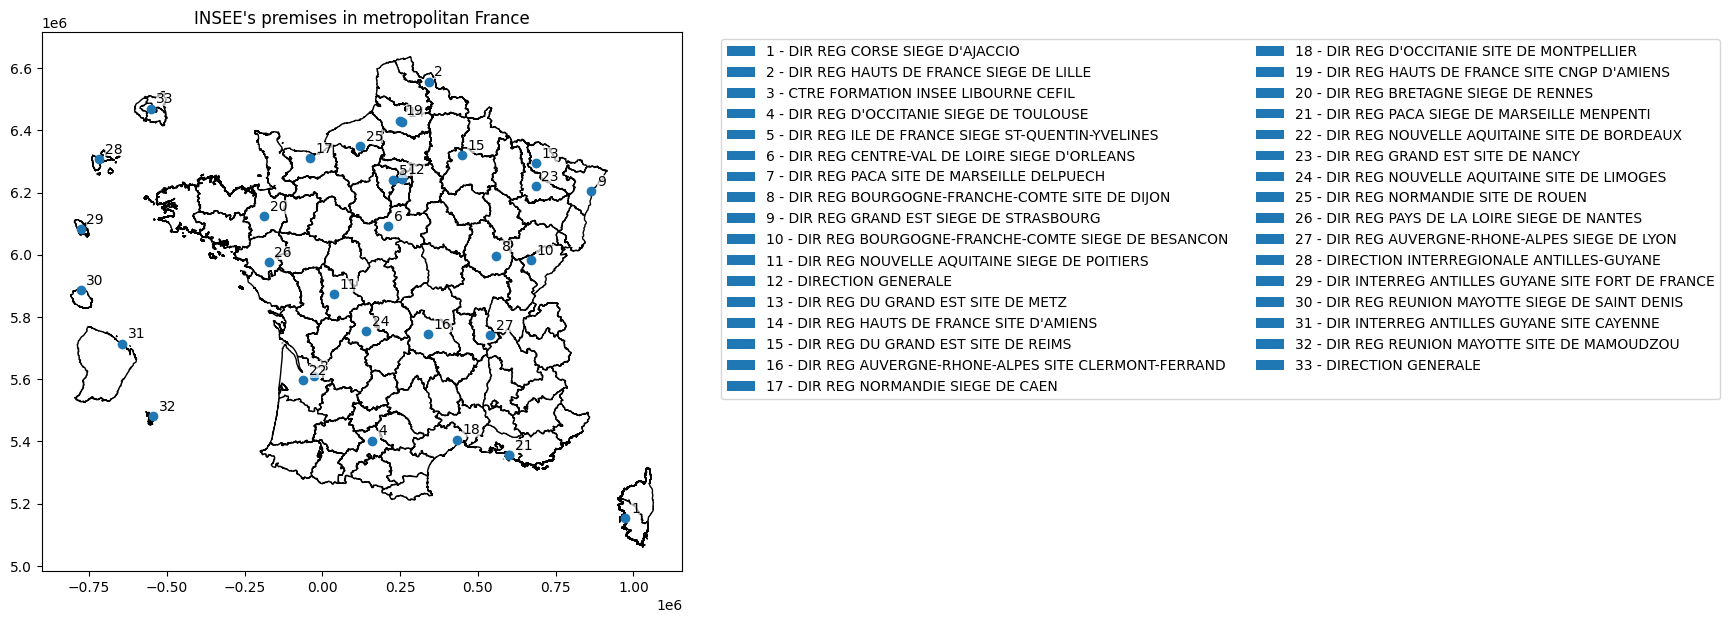

In [7]:
# plot
ax = mapdep.plot(color='white', edgecolor='black', figsize = (15,7))

gdf.plot(ax=ax)
plt.title("INSEE's premises in metropolitan France")

for x, y, i, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.i, gdf.name):
    ax.annotate(int(i), xy=(x, y), xytext=(4, 4), textcoords="offset points",
                bbox=dict(boxstyle='square,pad=0', fc="#ffffffb0", ec='none'))

legends = [mpatches.Patch(label=f) for f in gdf.name]
plt.legend(handles=legends, ncol=2, bbox_to_anchor=(1.05, 1))
plt.show()